<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #10: Twitter
`Fecha de entrega: Noviembre 14, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Extraer Tuits
Extraer mínimo 100 tuits de Twitter usando la API

(Si exponen sus claves, les haré maldades 😈)

❌🎃❌ ¡No Halloween!

In [1]:
import pandas as pd
import tweepy
import re
import regex
import emoji
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish') 

### Recolección de 100 Tweets sobre Transmilenio en Bogotá

In [3]:
tweets = tweepy.Cursor(api.search,
                       q=['transmilenio -RT'], 
                       lang='es', 
                       geocode=f'4.649178,-74.062827,45mi', 
                       tweet_mode='extended', 
                       include_rts=False).items(100) 

In [4]:
t = []

for tweet in tweets:
        temp = []
        temp.append(tweet.full_text)
        temp.append(tweet.created_at)
        temp.append("Bogotá")
        temp.append(tweet.user.location)
        temp.append(tweet.id)
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}")

        t.append(temp)

### Limpieza de texto

In [5]:
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    text = text.lower()
    text = " ".join([palabra for palabra in text.split() if palabra not in stopwords_sp])
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

### Creación del Data Frame

In [6]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,@Penalosadas @ClaudiaLopez @TransMilenio Se hi...,2020-11-13 03:21:50,Bogotá,Bogotá,1327089260214820868,https://twitter.com/i/web/status/1327089260214...,hizo elegir diciendo transmilenio... peñalo...,[],[],"[@penalosadas, @claudialopez, @transmilenio]"
1,#NoticiasCapital | La Alcaldía y Policía de Bo...,2020-11-13 03:20:00,Bogotá,"Bogotá, Colombia",1327088798354771970,https://twitter.com/i/web/status/1327088798354...,| alcaldía policía bogotá trabajan fortalecer...,[https://t.co/dz3sywfhsh],[#noticiascapital],[]
2,@ClaudiaLopez @TransMilenio Ojo le@roban el@celu,2020-11-13 03:16:43,Bogotá,"Bogotá, Colombia",1327087971884011520,https://twitter.com/i/web/status/1327087971884...,ojo le@roban el@celu,[],[],"[@claudialopez, @transmilenio]"
3,No sé si me da más ansiedad que me echen o mon...,2020-11-13 03:06:42,Bogotá,"Bogotá, Colombia",1327085452667580416,https://twitter.com/i/web/status/1327085452667...,sé si da ansiedad echen montar transmilenio ma...,[],[],[]
4,¿Cada cuánto monta en Transmilenio?\n🤔🤔🤔 https...,2020-11-13 02:38:39,Bogotá,Bogotá,1327078392399794177,https://twitter.com/i/web/status/1327078392399...,¿cada cuánto monta transmilenio? 🤔🤔🤔,[https://t.co/gslafe6nks],[],[]


###  `[25 pts]` Punto 2: Hacer una visualización sobre esos tuits

❌🎃❌ ¡No Halloween!

## Gráfico Emojis comunes en Tweets acerca de Transmilenio

In [7]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list 

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
0,🤔,3
5,🔴,3
2,👇,2
1,💩,1
3,🚨,1


In [8]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)


trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Nube de palabras acerca de Transmilenio

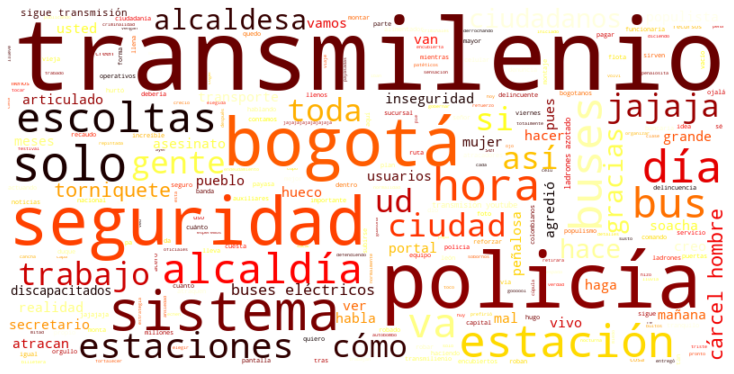

In [9]:
#Nuevo Pre procesado para nube de palabras#

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto
data['palabras'] = data['clean'].apply(lambda texto: pre_procesado(texto))


#Cargue Librerías#

import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

#Nube de palabras#

palabras = data.palabras.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='hot').generate(palabras) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



## Correlación entre palabras acerca de Transmilenio

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorización de palabras 
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado, ngram_range=(1,1), max_features=50)
tfidf = tfidf_vect.fit_transform(data.palabras.values)

#Cálculo de Distancias del Coseno
voc = [k for k,v in sorted(tfidf_vect.vocabulary_.items(), key=lambda kv: kv[1])]
cos = pd.DataFrame(tfidf.toarray())
cos = cosine_similarity(cos.T.values)
cos = pd.DataFrame(cos)
cos.columns = voc
cos.index = voc
cos

#Creación de la Gráfica#
traza = go.Heatmap(z=cos.values.tolist(),
                   x=cos.index.values,
                   y=cos.columns.values,
                   colorscale='Reds')

layout = go.Layout(title='Mapa de calor entre palabras sobre Transmilenio ',
                   width=800, height=800)
fig = go.Figure(data=[traza],layout=layout)
iplot(fig)
